In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('ab.csv')
data

,Unnamed: 0,Alpha_angle,Beta_angle,a2,b2
0,0,60.169227,71.559526,60.911922,72.195813
1,1,65.123459,67.135036,64.235836,68.706409
2,2,55.148880,71.167044,55.425148,69.096508
3,3,51.950529,76.005700,52.873240,76.084468
4,4,53.408616,78.953218,52.887574,77.166322
...,...,...,...,...,...
221,221,66.329062,69.096900,68.352641,67.858746
222,222,65.906288,70.331273,68.574194,69.898204
223,223,74.492239,61.691366,76.534792,62.533274
224,224,67.912600,64.138935,69.353710,59.819239


In [3]:
# Bland-Altman

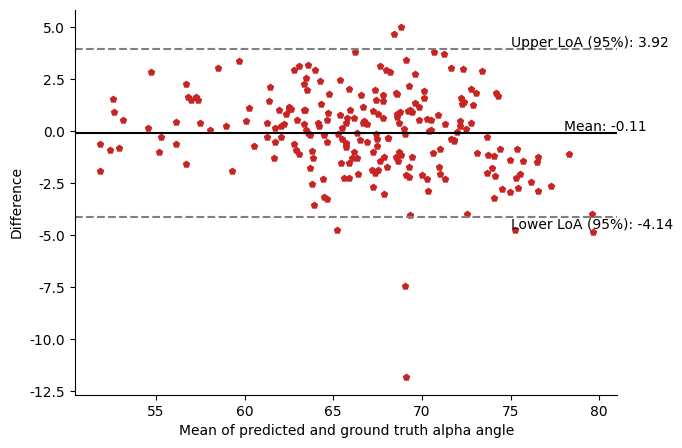

In [4]:
score1=data['Alpha_angle'].values
score2=data['a2'].values
mean=np.mean([score1,score2],axis=0)
diff=score1-score2
md=np.mean(diff)
sd=np.std(diff,axis=0)
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False)
plt.scatter(mean, diff,color='#C82423',s=20, marker='p')
plt.axhline(md, color='black', linestyle='-', label='Mean')
plt.text(78, md, f'Mean: {md:.2f}', ha='left', va='bottom')
plt.axhline(3.92, color='gray', linestyle='--', label='Upper LoA (95%)')
plt.text(75, 3.92, 'Upper LoA (95%): 3.92', ha='left', va='bottom')
plt.axhline(-4.14, color='gray', linestyle='--', label='Lower LoA (95%)')
plt.text(75, -4.14, 'Lower LoA (95%): -4.14', ha='left', va='top')
plt.xlabel('Mean of predicted and ground truth alpha angle')
plt.ylabel('Difference') 
plt.savefig('Alpha_scatter_plot.png',dpi=800)

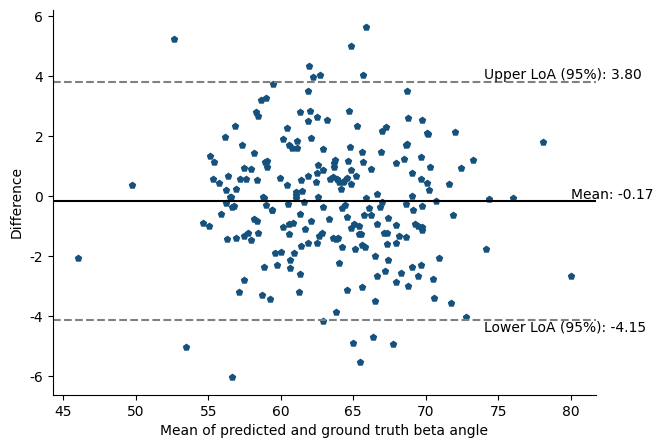

In [5]:
score1=data['Beta_angle'].values
score2=data['b2'].values
mean=np.mean([score1,score2],axis=0)
diff=score1-score2
md=np.mean(diff)
sd=np.std(diff,axis=0)
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False) 
plt.scatter(mean, diff,color='#14517C',s=20, marker='p')
plt.axhline(md,color='black', linestyle='-', label='Mean')
plt.text(80, md, f'Mean: {md:.2f}', ha='left', va='bottom')
plt.axhline(3.80, color='gray', linestyle='--', label='Upper LoA (95%)')
plt.text(74, 3.80, 'Upper LoA (95%): 3.80', ha='left', va='bottom')
plt.axhline(-4.15, color='gray', linestyle='--', label='Lower LoA (95%)')
plt.text(74, -4.15, 'Lower LoA (95%): -4.15', ha='left', va='top')
plt.xlabel('Mean of predicted and ground truth beta angle') 
plt.ylabel('Difference') 
plt.savefig('Beta_scatter_plot.png.png',dpi=800)

1.0160818895579804 -0.9649047991387079


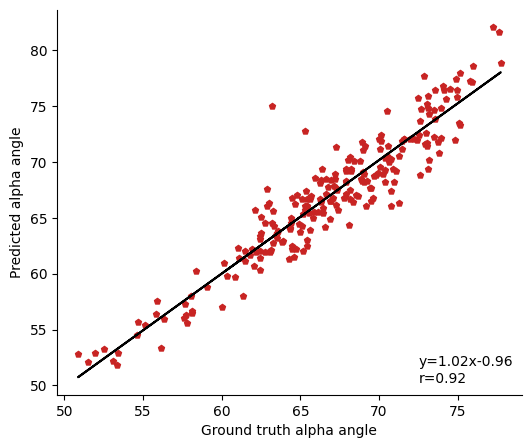

In [6]:
from sklearn.linear_model import LinearRegression
score1 = data['Alpha_angle'].values.reshape(-1, 1)
score2 = data['a2'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(score1, score2)
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False)
plt.scatter(score1, score2, color='#C82423', s=20, marker='p')
plt.xlabel('Ground truth alpha angle')
plt.ylabel('Predicted alpha angle') 
plt.text(72.5, 51.5, f'y=1.02x-0.96', ha='left', va='bottom')
plt.text(72.5, 50, f'r=0.92', ha='left', va='bottom')
plt.plot(score1, slope * score1 + intercept, color='black', linestyle='-')
plt.savefig('Alpha_r.png',dpi=800)
print(slope,intercept)

0.9521762674668968 3.2073052625275196


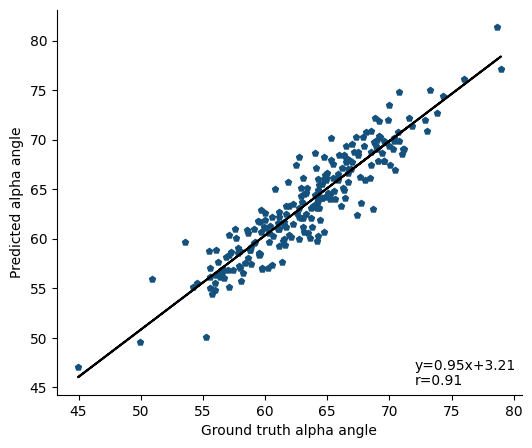

In [7]:
from sklearn.linear_model import LinearRegression
score1 = data['Beta_angle'].values.reshape(-1, 1)
score2 = data['b2'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(score1, score2)
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
plt.figure(figsize=(6,5))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rc('axes', unicode_minus=False)
plt.scatter(score1, score2, color='#14517C', s=20, marker='p')
plt.xlabel('Ground truth alpha angle') 
plt.ylabel('Predicted alpha angle') 
plt.text(72, 46.5, f'y=0.95x+3.21', ha='left', va='bottom')
plt.text(72, 45, f'r=0.91', ha='left', va='bottom')
plt.plot(score1, slope * score1 + intercept, color='black', linestyle='-')
plt.savefig('Beta_r.png',dpi=800)
print(slope,intercept)

In [8]:
data=pd.read_csv('soft_hard.csv')
data

,Unnamed: 0,plus,hard,plus.1,hard.1
0,0.0200,2.764,3.189,2.292,2.461
1,0.0100,2.184,2.421,1.956,2.100
2,0.0050,1.844,2.053,1.855,1.983
3,0.0010,1.706,1.728,1.779,1.832
4,0.0001,1.669,1.704,1.762,1.812
5,0.0000,1.662,1.695,1.756,1.802


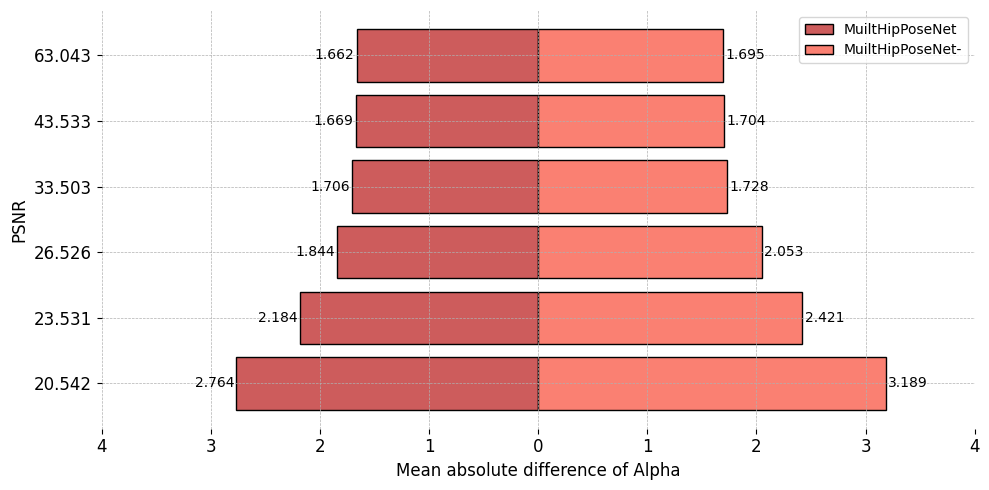

In [9]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['20.542', '23.531', '26.526', '33.503', '43.533','63.043']
first_column = data['plus'].values
second_column = data['hard'].values
labels = np.array(labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.barh(labels, -first_column, align='center', color='#CD5C5C', edgecolor='black', label='MuiltHipPoseNet')
bars2 = ax.barh(labels, second_column, align='center', color='#FA8072', edgecolor='black', label='MuiltHipPoseNet-')
for bar in bars1:
    ax.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height() / 2, f'{-bar.get_width():.3f}', 
            va='center', ha='right', color='black', fontsize=10)
for bar in bars2:
    ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.3f}', 
            va='center', ha='left', color='black', fontsize=10)
xticks = [-4,-3,-2,-1,0,1,2,3,4]
ax.set_yticks(labels)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['4','3','2','1','0','1','2','3','4'], fontsize=12)
ax.set_xlabel('Mean absolute difference of Alpha', fontsize=12)
ax.set_ylabel('PSNR', fontsize=12)
# ax.set_title('Butterfly Chart', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend()
plt.tight_layout()
plt.savefig('Alpha_hu.png',dpi=800)

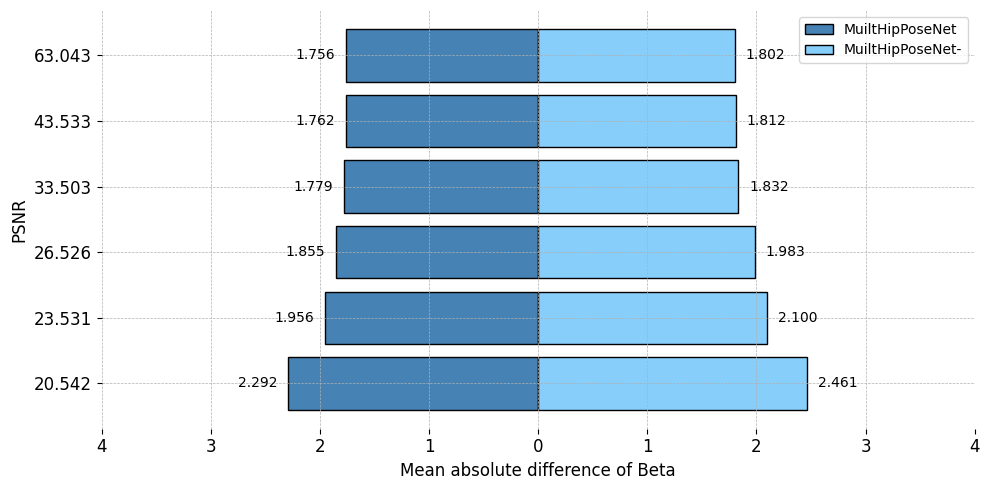

In [10]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['20.542', '23.531', '26.526', '33.503', '43.533','63.043']
first_column = data['plus.1'].values
second_column = data['hard.1'].values
labels = np.array(labels)
fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.barh(labels, -first_column, align='center', color='#4682B4', edgecolor='black', label='MuiltHipPoseNet')
bars2 = ax.barh(labels, second_column, align='center', color='#87CEFA', edgecolor='black', label='MuiltHipPoseNet-')
for bar in bars1:
    ax.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height() / 2, f'{-bar.get_width():.3f}', 
            va='center', ha='right', color='black', fontsize=10)
for bar in bars2:
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.3f}', 
            va='center', ha='left', color='black', fontsize=10)
xticks = [-4,-3,-2,-1,0,1,2,3,4]
ax.set_yticks(labels)
ax.set_yticklabels(labels, fontsize=12)
ax.set_xticks(xticks)
ax.set_xticklabels(['4','3','2','1','0','1','2','3','4'], fontsize=12)
ax.set_xlabel('Mean absolute difference of Beta', fontsize=12)
ax.set_ylabel('PSNR', fontsize=12)
# ax.set_title('Butterfly Chart', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend()
plt.tight_layout()
plt.savefig('Beta_hu.png',dpi=800)

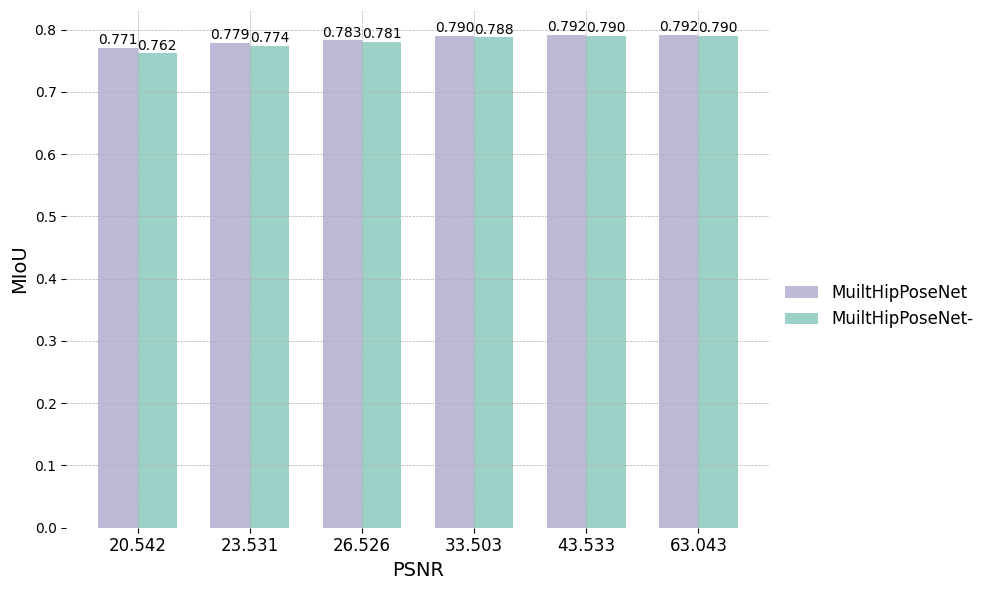

In [11]:
import matplotlib.pyplot as plt
import numpy as np
models = ['20.542', '23.531', '26.526', '33.503', '43.533','63.043']
plus = [0.771, 0.779,0.783,0.790,0.792,0.792]
hard = [0.762,0.774,0.781,0.788,0.790,0.790]
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, plus, width, label='MuiltHipPoseNet', color='#BDBAD7')
bars2 = ax.bar(x + width/2, hard, width, label='MuiltHipPoseNet-', color='#9CD1C7') #9CD1C7
ax.set_xlabel('PSNR', fontsize=14)
ax.set_ylabel('MIoU', fontsize=14)
# ax.set_title('Accuracy and Sensitivity of Different Conditions', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(frameon=False, loc=0, bbox_to_anchor=(1, 0.5), prop={'size':12})
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('MIoU.png',dpi=800)

[[303.8732394366197, 248.943661971831], [352.8, 247.5], [395.3271028037383, 325.7009345794392], [388.78504672897196, 217.28971962616822], [368.22429906542055, 263.0841121495327], [369.36619718309856, 270.07042253521126]]


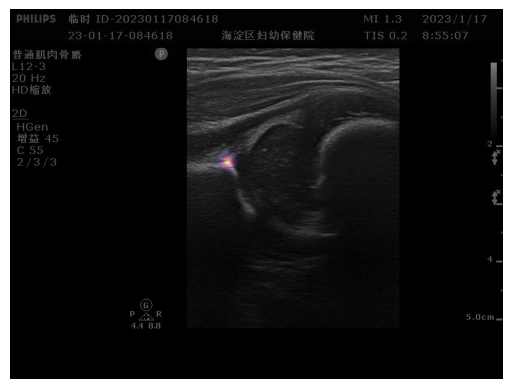

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
def json_to_numpy(dataset_path):
    with open(dataset_path,  'r', encoding='utf8') as fp:
        json_data = json.load(fp)
        points = json_data['shapes']
    # print(points)
    landmarks = []
    for point in points:
        if point['label'] == '基线点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '骨缘点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '髂骨下缘点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '盂唇中心点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '骨性髋臼顶凸面最高点':
            for p in point['points']:
                landmarks.append(p)
    for point in points:
        if point['label'] == '回声失落点':
            for p in point['points']:
                landmarks.append(p)   
    assert len(landmarks)==6
    print(landmarks)
    landmarks = np.array(landmarks)
    landmarks = landmarks.reshape(-1, 2)
    points=[]
    for x in landmarks:
        points.append(tuple(x))
    return points
def generate_heatmaps(joints, scare, offset, input_h, input_w, gauss):
    target = np.zeros((len(joints), input_h, input_w), dtype=np.float32)
    for joint_id, joint in enumerate(joints):
        mu_x = joint[0] * scare + offset
        mu_y = joint[1] * scare + offset
        x = np.arange(0, input_w, 1, np.float32)
        y = np.arange(0, input_h, 1, np.float32)
        y = y[:, np.newaxis]
        target[joint_id] = np.exp(-((x - mu_x) ** 2 + (y - mu_y) ** 2) / (2 * gauss ** 2))
    return target * 255
# Load image
image_path = "5.jpg"
image = plt.imread(image_path)
# Load and process landmarks
dataset_path = "5.json"
landmarks = json_to_numpy(dataset_path)
# Generate heatmaps
scare = 1  # scaling factor
offset = 0  # offset factor
input_h, input_w = image.shape[:2]  # assuming image has shape (height, width)
gauss = 7  # gaussian sigma
heatmaps = generate_heatmaps(landmarks, scare, offset, input_h, input_w, gauss)
# Display image
plt.imshow(image)
# Display heatmaps
# target = np.zeros((input_h, input_w), dtype=np.float32)
# for heatmap in heatmaps:
#     target+=heatmap
# plt.imshow(target, alpha=0.5, cmap='magma', interpolation='nearest')
plt.imshow(heatmaps[1], alpha=0.5, cmap='magma', interpolation='nearest')#magma
plt.axis('off')
plt.savefig('example/5_point_blend.png',dpi=800)

In [13]:
from PIL import Image
import os
img1 = Image.open(os.path.join('example', '5_original.jpg'))
img2 = Image.open(os.path.join('example', '5_mask.png'))
if img1.mode != img2.mode:
    img2 = img2.convert(img1.mode)
img2 = img2.resize(img1.size)
blended = Image.blend(img1, img2, alpha=0.5)
blended.save('example/5_blended.png')
img1 = Image.open(os.path.join('example', '6_original.jpg'))
img2 = Image.open(os.path.join('example', '6_mask.png'))
if img1.mode != img2.mode:
    img2 = img2.convert(img1.mode)
img2 = img2.resize(img1.size)
blended = Image.blend(img1, img2, alpha=0.5)
blended.save('example/6_blended.png')

In [1]:
import cv2
import os
def resize_images(folder_path, avg_width, avg_height):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, filename))
            resized_img = cv2.resize(img, (avg_width, avg_height))
            cv2.imwrite(os.path.join('resized', filename.split('.')[0] + '_resized.jpg'), resized_img)
def calculate_average_size(folder_path):
    total_width = 0
    total_height = 0
    num_images = 0

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, filename))
            total_width += img.shape[1] 
            total_height += img.shape[0] 
            num_images += 1
    avg_width = int(total_width / num_images)
    avg_height = int(total_height / num_images)
    return avg_width, avg_height

In [3]:
folder_path = 'mask' 
avg_width, avg_height = calculate_average_size(folder_path)
resize_images(folder_path, avg_width, avg_height)

In [16]:
folder_path = 'blend'  
avg_width, avg_height = calculate_average_size(folder_path)
resize_images(folder_path, avg_width, avg_height)